In [1]:
# pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, AncillaRegister
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp, Pauli
from qiskit.circuit import ParameterVector
from qiskit_algorithms.optimizers import COBYLA, NELDER_MEAD
from itertools import product
from qiskit.quantum_info import Statevector
from qiskit.circuit.classical import expr 

Bit-Flip error 

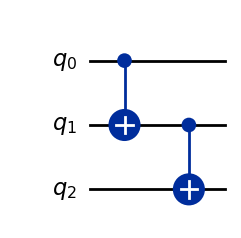

In [3]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

ar = AncillaRegister(2, 'a')
acr = ClassicalRegister(2, 'ac')

qc_encoding_bit = QuantumCircuit(qr)

qc_encoding_bit.cx(0,1)
qc_encoding_bit.cx(1,2)

qc_encoding_bit.draw('mpl')

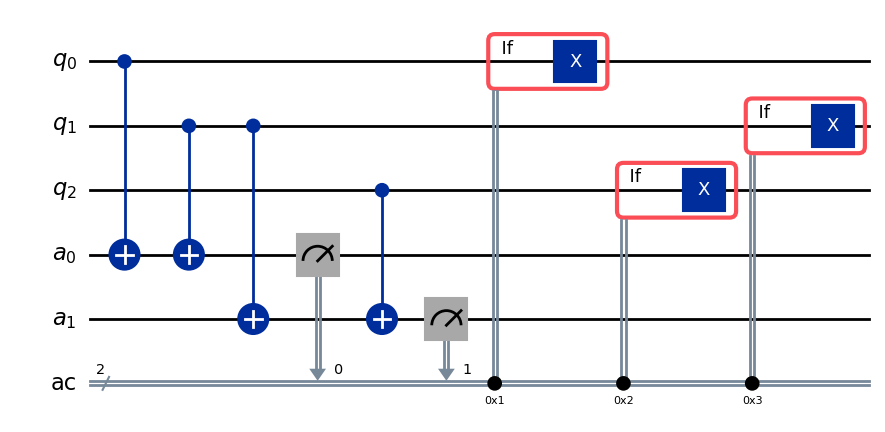

In [4]:
qc_stabilizer_bit = QuantumCircuit( qr, ar, acr )

qc_stabilizer_bit.cx(0,3)
qc_stabilizer_bit.cx(1,3)
qc_stabilizer_bit.cx(1,4)
qc_stabilizer_bit.cx(2,4)

qc_stabilizer_bit.measure( ar, acr )

with qc_stabilizer_bit.if_test( (acr,1) ): 
        qc_stabilizer_bit.x(0)
with qc_stabilizer_bit.if_test( (acr,2) ): 
        qc_stabilizer_bit.x(2)
with qc_stabilizer_bit.if_test( (acr,3) ): 
        qc_stabilizer_bit.x(1)

qc_stabilizer_bit.draw('mpl') 

In [5]:
qc_bit = QuantumCircuit( qr, ar, acr )
qc_bit.compose( qc_encoding_bit, inplace=True )
qc_bit.barrier()
qc_bit.compose( qc_stabilizer_bit, clbits=acr, inplace=True )
# qc_bit.draw('mpl', filename='bit_code.svg')

Phase-flip error

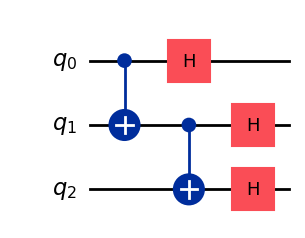

In [6]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')

ar = AncillaRegister(2, 'a')
acr = ClassicalRegister(2, 'ac')

qc_encoding_phase = QuantumCircuit(qr)

qc_encoding_phase.cx(0,1)
qc_encoding_phase.cx(1,2)
qc_encoding_phase.h(qr)

qc_encoding_phase.draw('mpl')

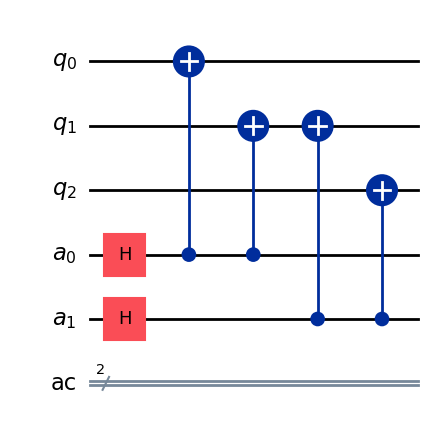

In [7]:
qc_stabilizer_phase = QuantumCircuit( qr, ar, acr )

qc_stabilizer_phase.h(ar)

qc_stabilizer_phase.cx(3,0)
qc_stabilizer_phase.cx(3,1)
qc_stabilizer_phase.cx(4,1)
qc_stabilizer_phase.cx(4,2)

# qc_stabilizer_phase.h(ar)

# qc_stabilizer_phase.measure( ar, acr )

# with qc_stabilizer_phase.if_test( (acr,1) ): 
#         qc_stabilizer_phase.z(0)
# with qc_stabilizer_phase.if_test( (acr,2) ): 
#         qc_stabilizer_phase.z(2)
# with qc_stabilizer_phase.if_test( (acr,3) ): 
#         qc_stabilizer_phase.z(1)

qc_stabilizer_phase.draw('mpl') 

In [8]:
qc_phase = QuantumCircuit( qr, ar, acr )
qc_phase.compose( qc_encoding_phase, inplace=True )
qc_phase.barrier()
qc_phase.compose( qc_stabilizer_phase, clbits=acr, inplace=True )
# qc_phase.draw('mpl', filename='phase_code.svg' )

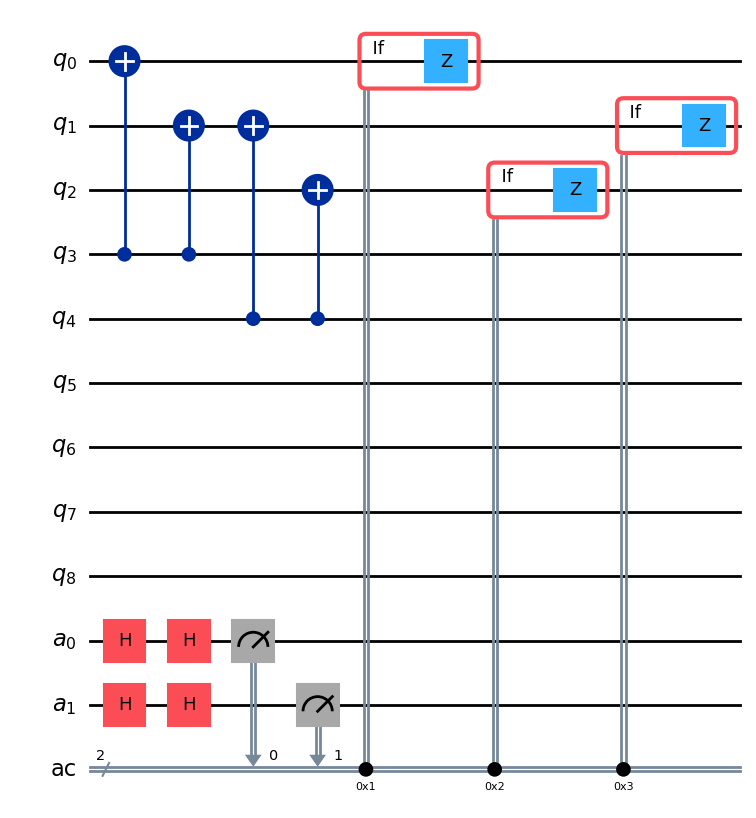

In [9]:
qr = QuantumRegister(9, 'q')
ar = AncillaRegister(2, 'a')
cr = ClassicalRegister(2, 'ac')

qc_stabilizer_phase_3q = QuantumCircuit( qr, ar, acr )

qc_stabilizer_phase_3q.h(ar)

qc_stabilizer_phase_3q.cx(3,0)
qc_stabilizer_phase_3q.cx(3,1)
qc_stabilizer_phase_3q.cx(4,1)
qc_stabilizer_phase_3q.cx(4,2)

qc_stabilizer_phase_3q.h(ar)

qc_stabilizer_phase_3q.measure( ar, acr )

with qc_stabilizer_phase_3q.if_test( (acr,1) ): 
        qc_stabilizer_phase_3q.z(0)
with qc_stabilizer_phase_3q.if_test( (acr,2) ): 
        qc_stabilizer_phase_3q.z(2)
with qc_stabilizer_phase_3q.if_test( (acr,3) ): 
        qc_stabilizer_phase_3q.z(1)

qc_stabilizer_phase_3q.draw('mpl') 

Código de Shor 

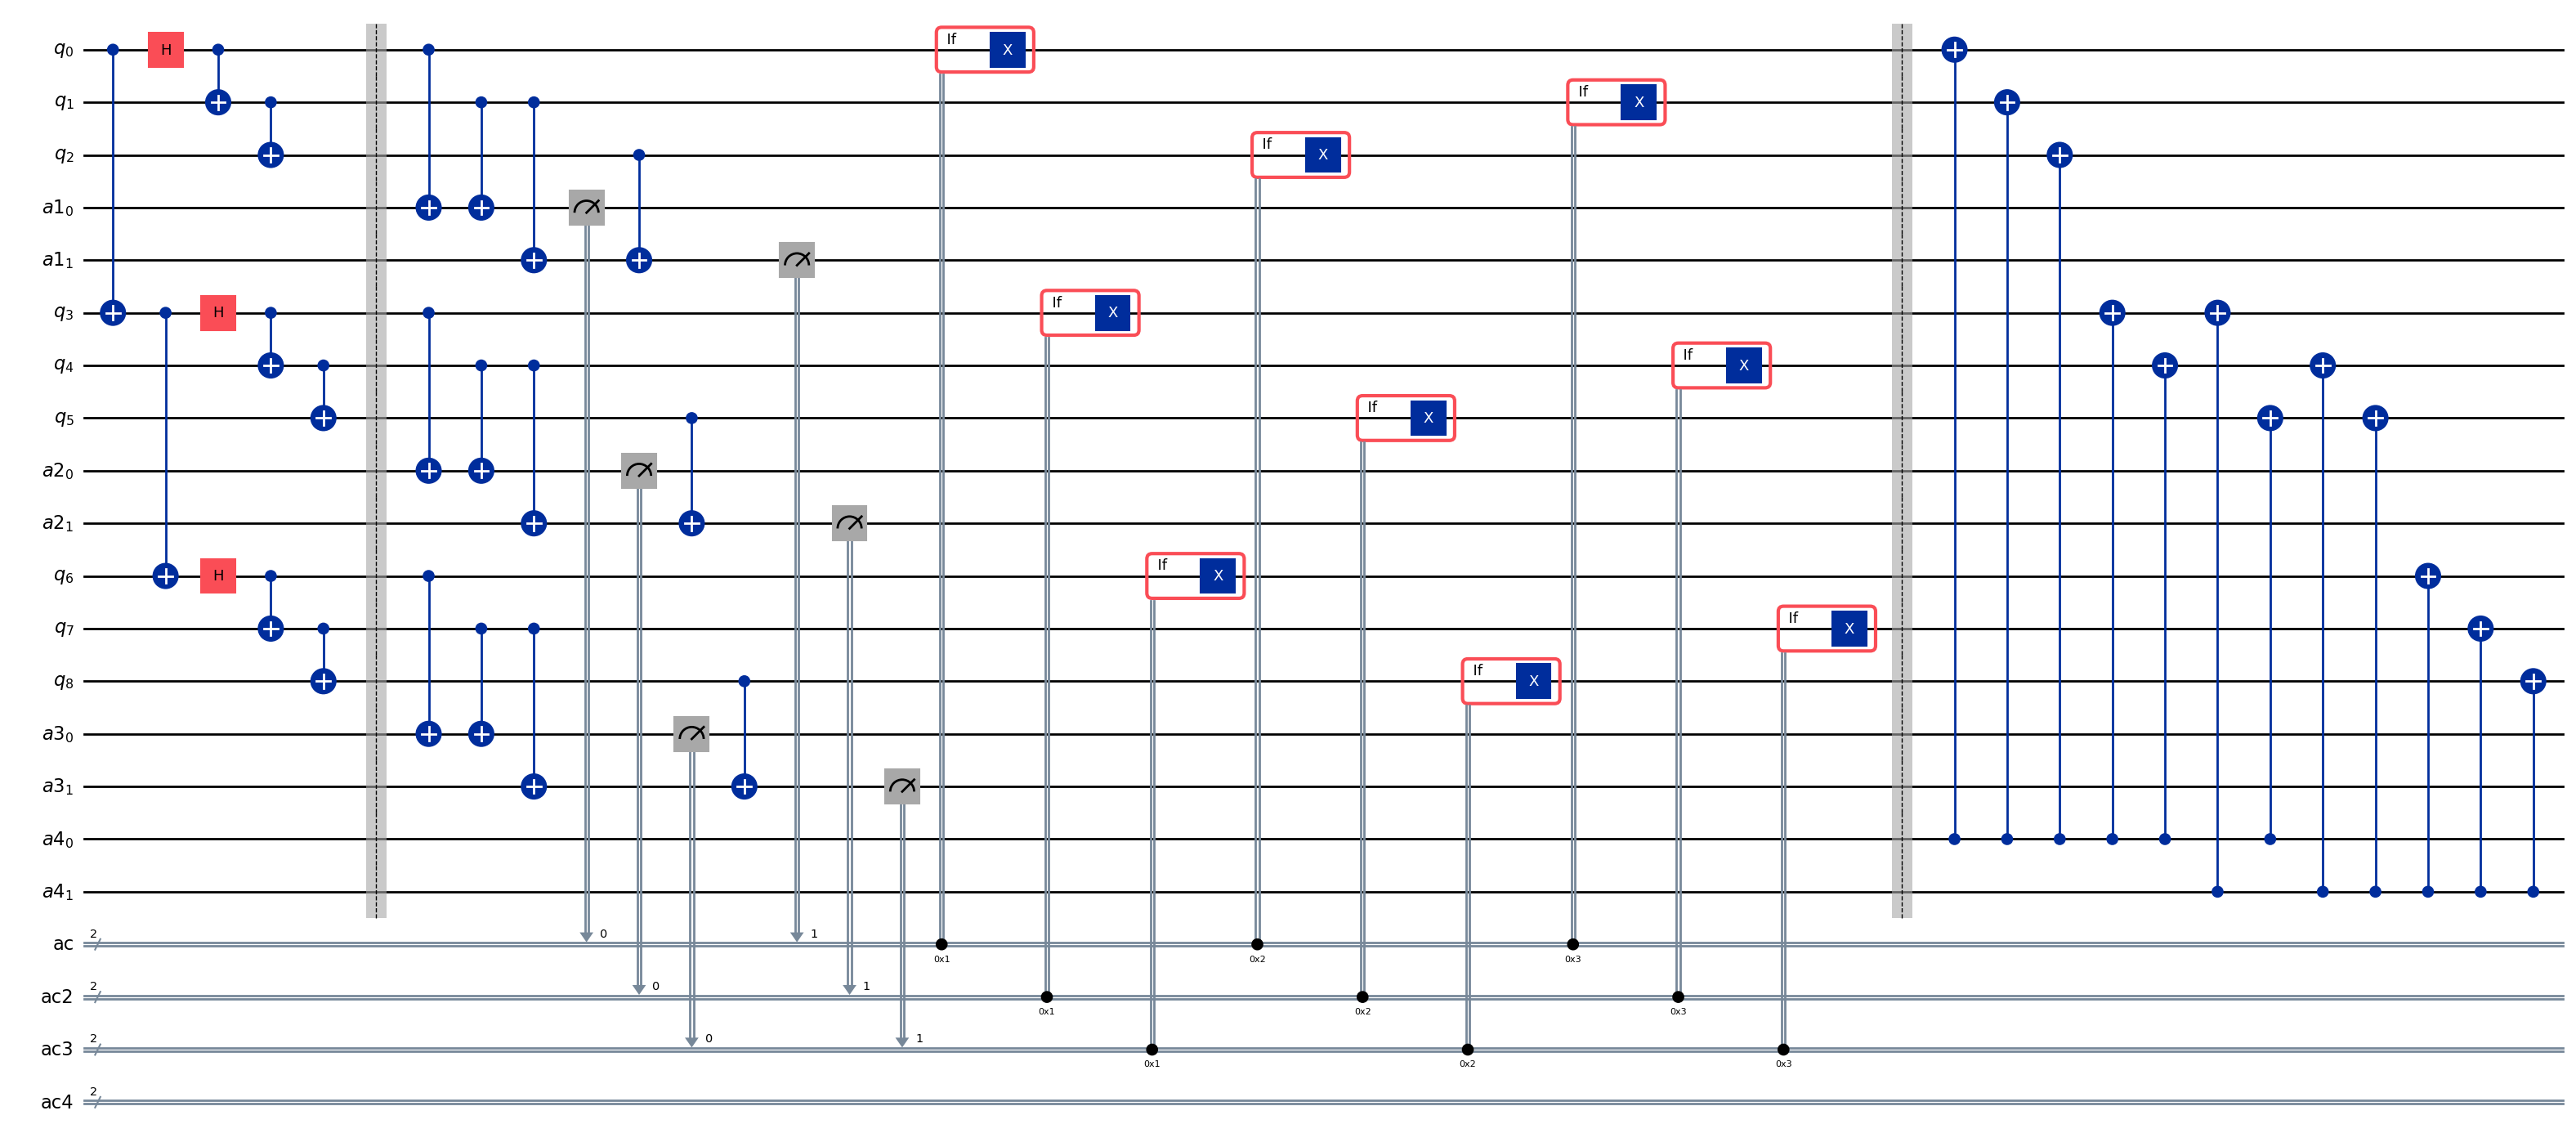

In [10]:
qr = QuantumRegister(9, 'q')
ar1 = AncillaRegister(2, 'a1')
cr1 = ClassicalRegister(2, 'ac')
ar2 = AncillaRegister(2, 'a2')
cr2 = ClassicalRegister(2, 'ac2')
ar3 = AncillaRegister(2, 'a3')
cr3 = ClassicalRegister(2, 'ac3')
ar4 = AncillaRegister(2, 'a4')
cr4 = ClassicalRegister(2, 'ac4')

qc_shor = QuantumCircuit( qr, ar1, ar2, ar3, ar4, cr1, cr2, cr3, cr4 )

qc_shor.compose( qc_encoding_phase, [0,3,6], inplace=True )
for j in [0,3,6]:
    qc_shor.compose( qc_encoding_bit, [0+j,1+j,2+j], inplace=True )
qc_shor.barrier()
qc_shor.compose( qc_stabilizer_bit, qubits=[0,1,2,9,10], clbits=cr1, inplace=True )
qc_shor.compose( qc_stabilizer_bit, qubits=[3,4,5,11,12], clbits=cr2, inplace=True )
qc_shor.compose( qc_stabilizer_bit, qubits=[6,7,8,13,14], clbits=cr3, inplace=True )

qc_shor.barrier()
qc_shor.cx(15,0)
qc_shor.cx(15,1)
qc_shor.cx(15,2)
qc_shor.cx(15,3)
qc_shor.cx(15,4)
qc_shor.cx(15,5)

qc_shor.cx(16,3)
qc_shor.cx(16,4)
qc_shor.cx(16,5)
qc_shor.cx(16,6)
qc_shor.cx(16,7)
qc_shor.cx(16,8)

# qc_shor.cx(0,2)
# qc_shor.cx(0,1)
# qc_shor.cx(3,5)
# qc_shor.cx(3,4)
# qc_shor.cx(6,8)
# qc_shor.cx(6,7)

# qc_shor.cx(15,0)
# qc_shor.cx(15,3)
# qc_shor.cx(16,3)
# qc_shor.cx(16,6)

# qc_shor.cx(0,1)
# qc_shor.cx(0,2)
# qc_shor.cx(3,4)
# qc_shor.cx(3,5)
# qc_shor.cx(6,7)
# qc_shor.cx(6,8)


# for i, j in enumerate([0,3,6]):
#     qc_shor.compose( qc_stabilizer_bit, qubits=[0+j,1+j,2+j,9+2*i,10+2*i], clbits=[2*i,2*i+1], inplace=True )

qc_shor.draw('mpl', fold=-1,  wire_order=[0,1,2,9,10,3,4,5,11,12,6,7,8,13,14,15,16], filename='shor_code.svg' ) 

In [11]:
qc = QuantumCircuit(5)
qc.cx(0,1)

In [12]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeRochesterV2, FakeParisV2 
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import transpile

# Specify a QPU to use for the noise model
real_backend = FakeRochesterV2()
# real_backend = GenericBackendV2(num_qubits=27)

aer = AerSimulator()

In [13]:
coupling_map = list( real_backend.coupling_map )
basis_gates = [ 'h', 'u', 'cx', 'swap' ]

OrderedDict({'cx': 32, 'if_else': 9, 'measure': 6, 'h': 3, 'barrier': 2})


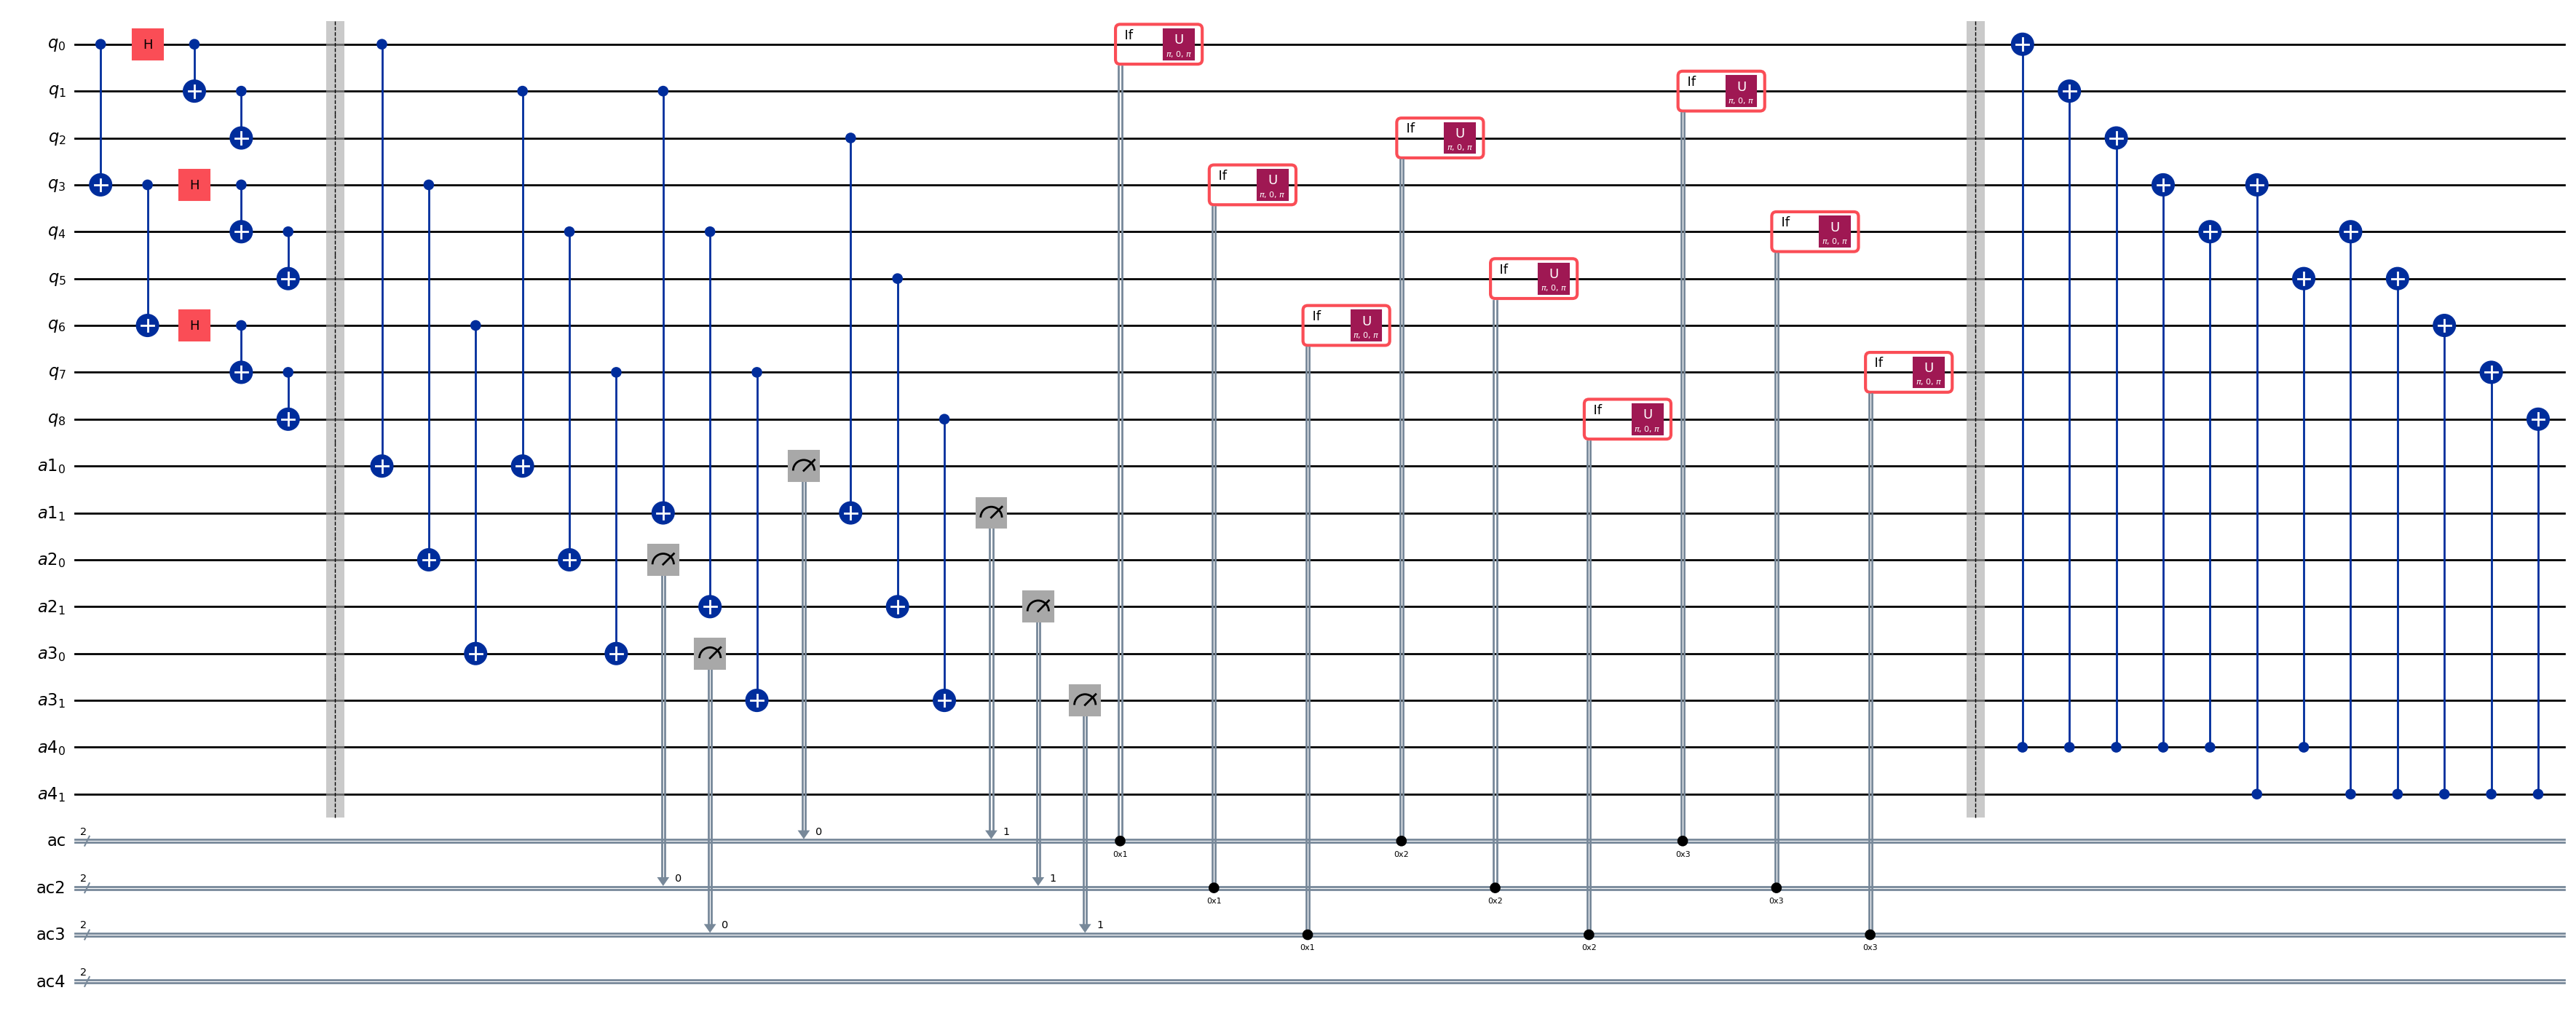

In [14]:
qc_transpiled = transpile( qc_shor, aer, basis_gates=basis_gates, 
                            # coupling_map=real_backend.coupling_map, 
                            optimization_level=1 , seed_transpiler=0 )
print( qc_transpiled.count_ops() )
qc_transpiled.draw('mpl', fold=-1)  

OrderedDict({'swap': 83, 'cx': 32, 'if_else': 9, 'measure': 6, 'h': 3, 'barrier': 2})


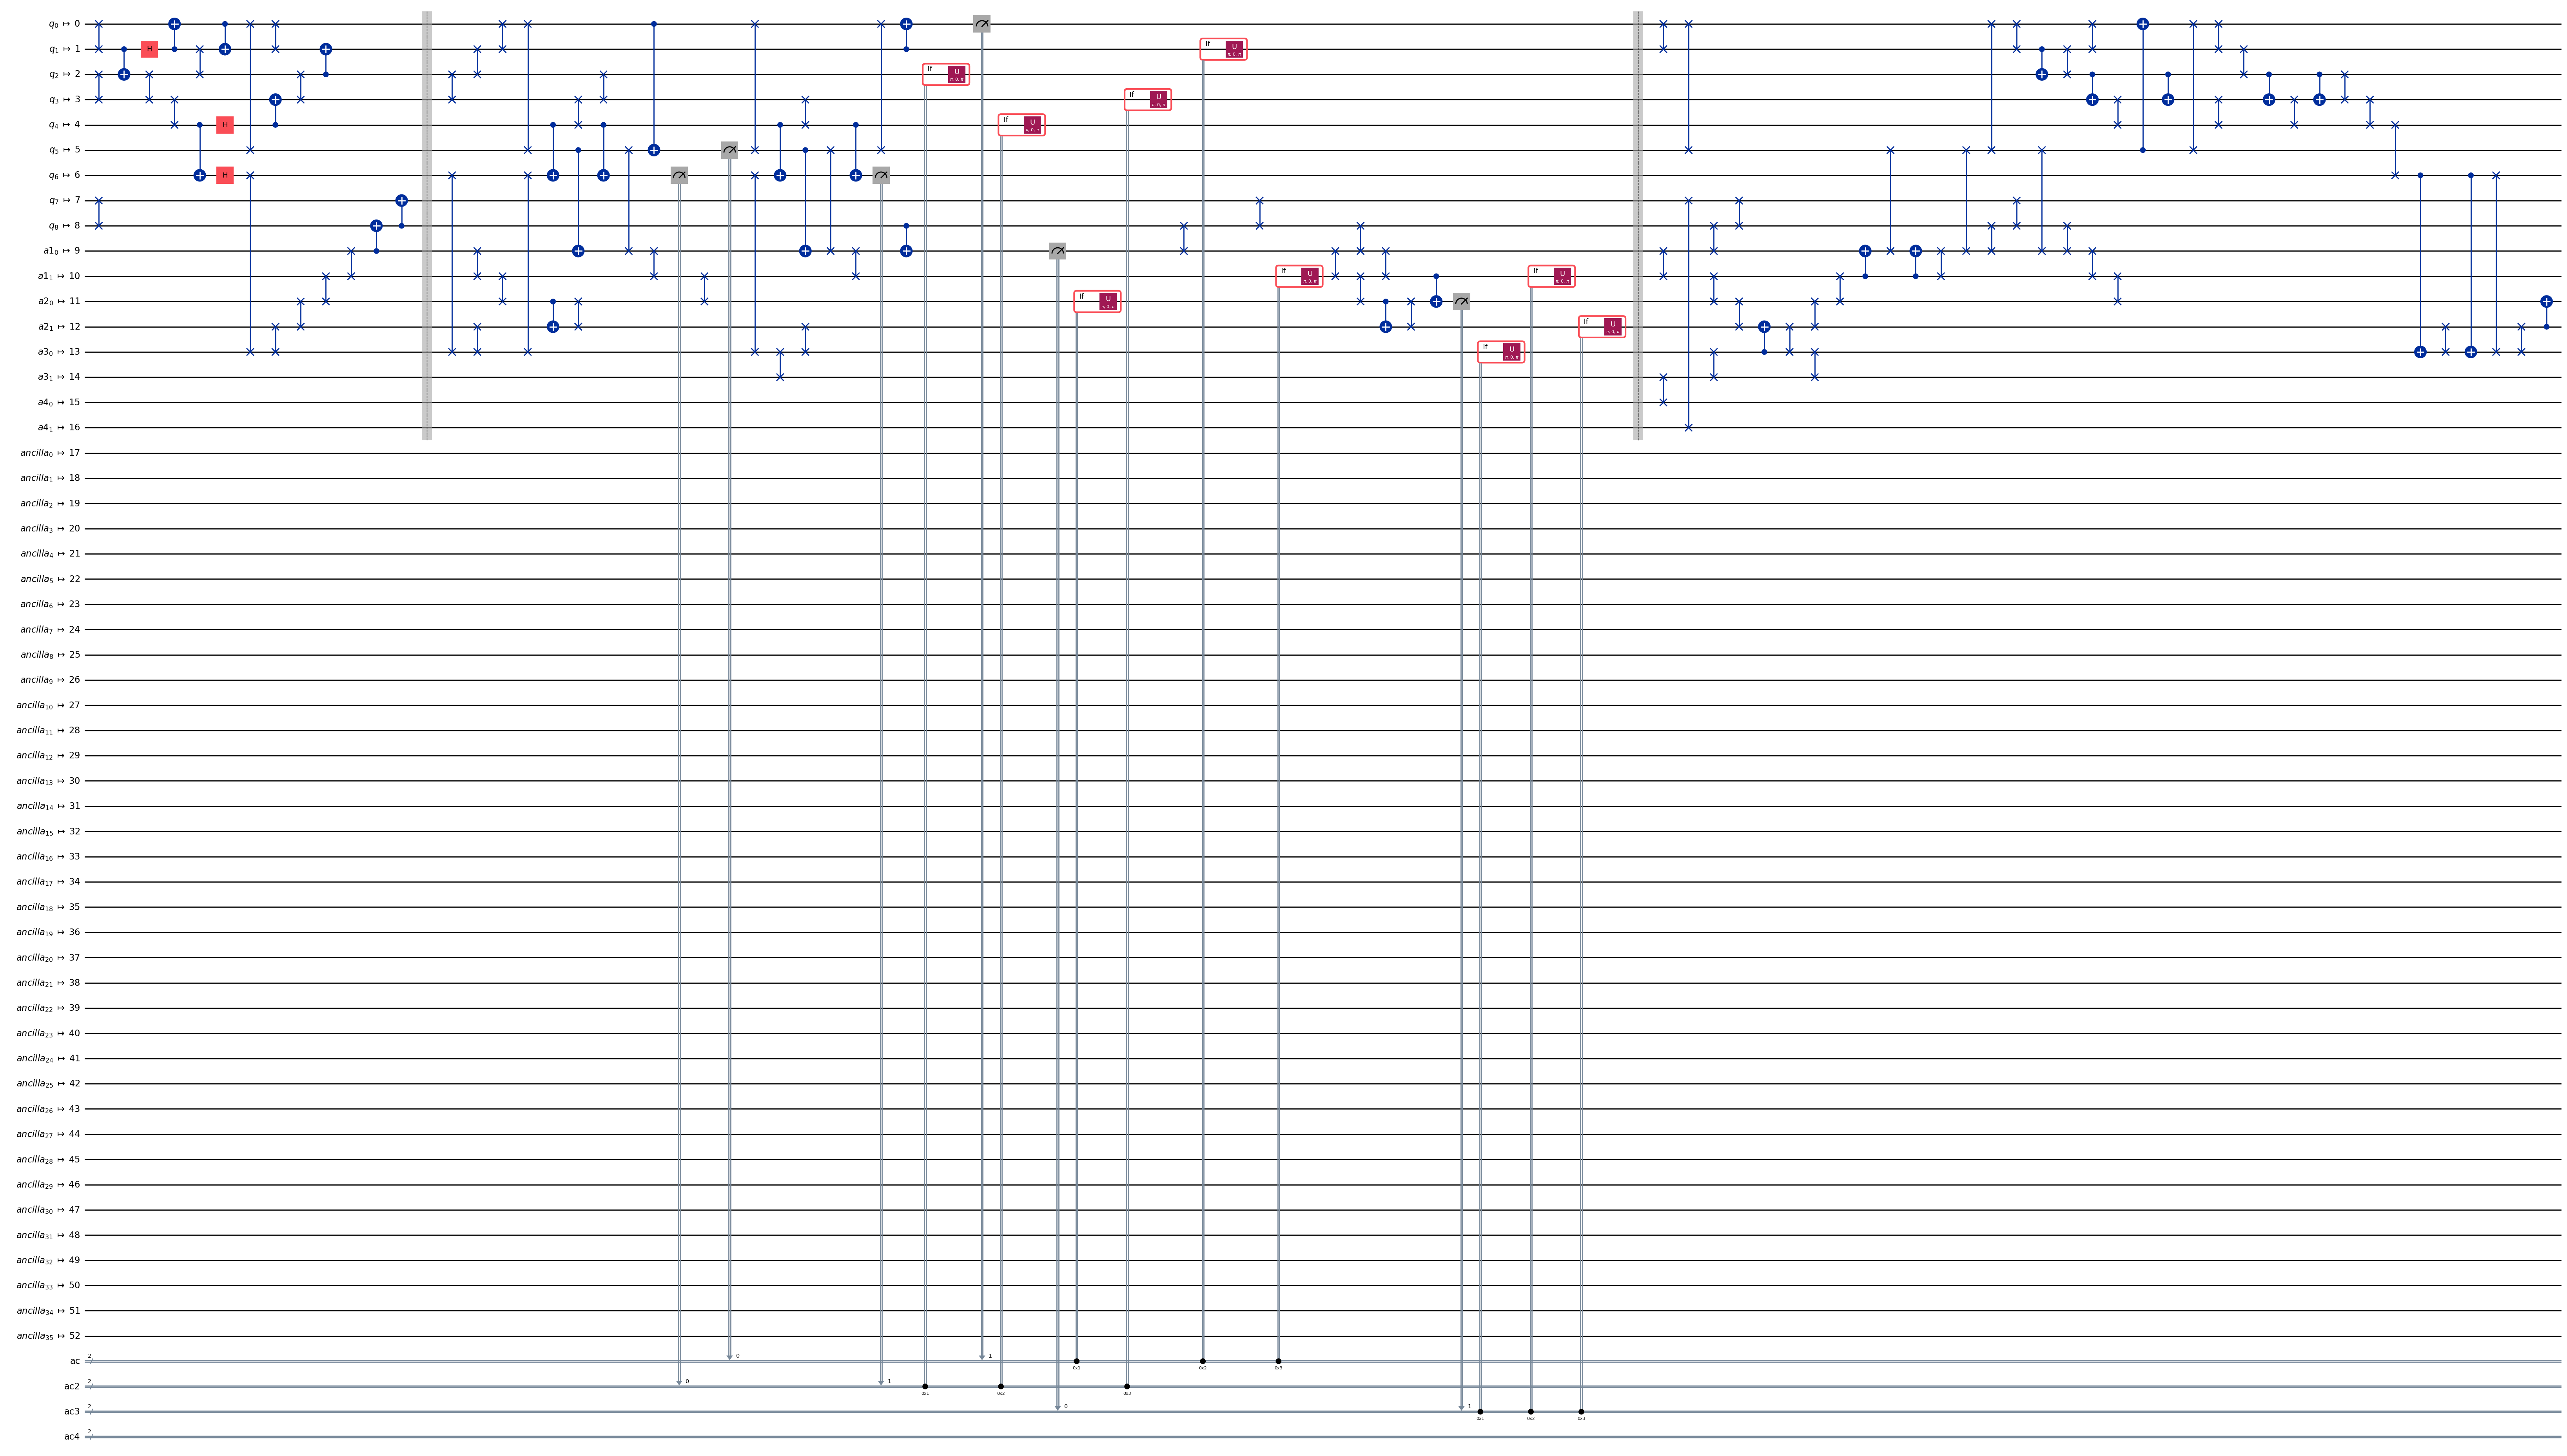

In [15]:
qc_transpiled = transpile( qc_shor, aer, basis_gates=basis_gates, 
                            coupling_map=real_backend.coupling_map, 
                            optimization_level=0, seed_transpiler=0 )
print( qc_transpiled.count_ops() )
qc_transpiled.draw('mpl', fold=-1)  

OrderedDict({'swap': 42, 'cx': 32, 'if_else': 9, 'measure': 6, 'h': 3, 'barrier': 2})


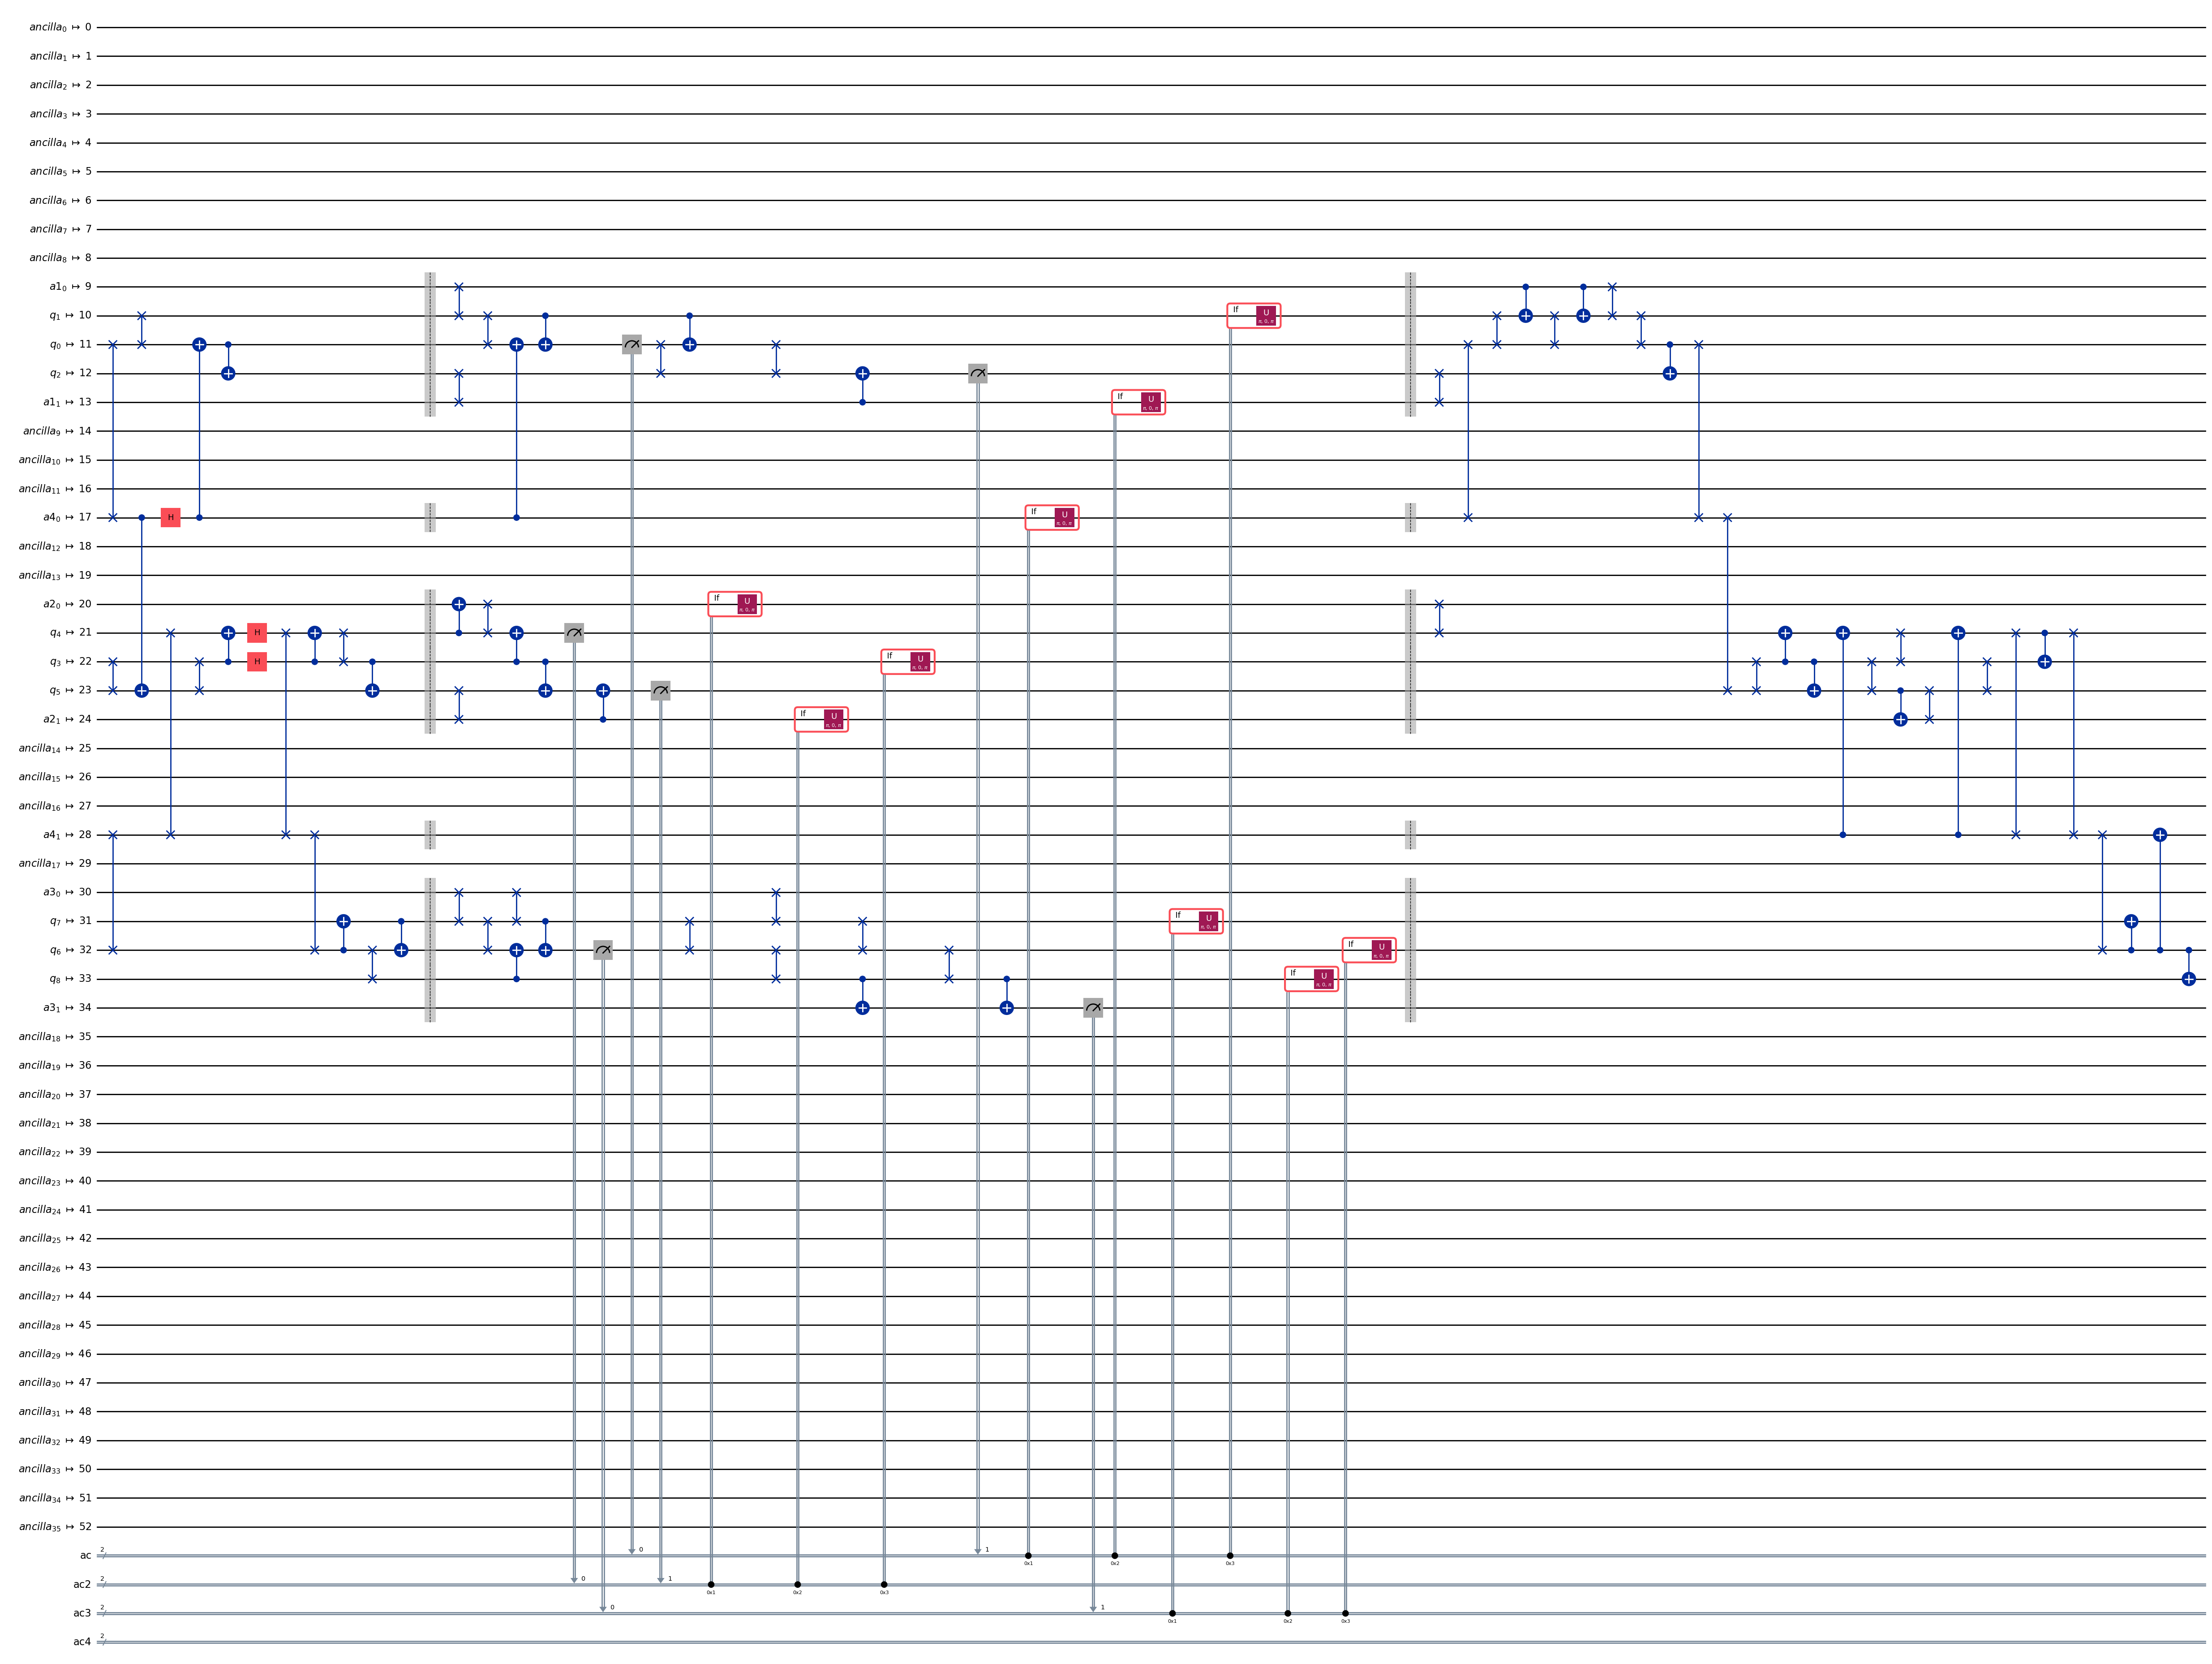

In [17]:
layout = [11,10, 12,
            22,21,23,
            32,31,33,
            9,13,
            20,24,
            30,34,
            17,28,]

qc_transpiled = transpile( qc_shor, aer, basis_gates=basis_gates, 
                                coupling_map=real_backend.coupling_map, 
                                optimization_level=0 , seed_transpiler=0,
                                initial_layout=layout )
print( qc_transpiled.count_ops() ) 
qc_transpiled.draw('mpl', fold=-1) 